In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
sns.set(rc={'figure.figsize':(12,6)})

In [35]:
df = pd.read_csv('DummieVariablesDataset.csv')

In [36]:
len(df[df['PercentProfit'] >= 0.05])

20590

In [37]:
len(df[df['PercentProfit'] < 0.05])

19383

I am going to split Percentage profit into two groups:

- lower than 5% profit as 0
- higher or equal 5% profit as 1

I choese this split on perpouse becouse company has some costs that decrease the total profit. I am not sure how much shop need to earn to create prfit, but I presume that 5 % profit shoud be enought for positive income

In [38]:
df['isMoreThan5Percent'] = np.where((df['PercentProfit'] >= 0.05), 1, 0)

In [39]:
X = df[['Size', 'Weight', 'StandardCost',
       'isDiscounted', 
        'Silver', 'Red', 'Yellow', 'Blue', 'L', 'M',
       'OneYAbvl', 'TwoYaveliable',
       '2012Orders', '2013Orders', '2014Orders',
       'Road Bikes', 'Touring Bikes' 
]]

In [40]:
y = df['isMoreThan5Percent']

<AxesSubplot:xlabel='isMoreThan5Percent', ylabel='Size'>

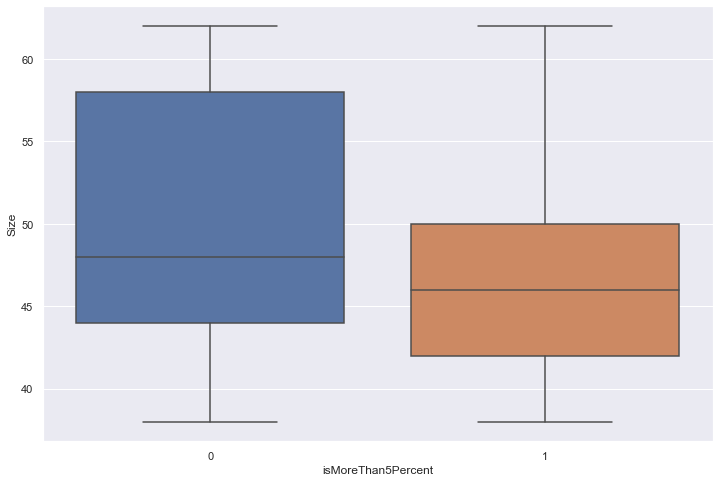

In [41]:
# Gross PRofit by cat Name split into class grups of bike form L-Low to H-High
plt.figure(figsize=(12,8))
sns.boxplot(y="Size", x="isMoreThan5Percent",data=df)

As wee can see the avg size for positive profit is lower than unprofitable bikes.

<AxesSubplot:xlabel='isMoreThan5Percent', ylabel='Size'>

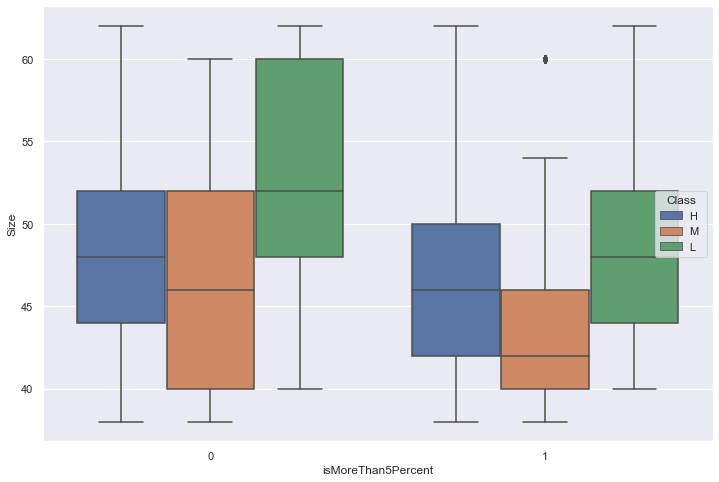

In [44]:
# Gross PRofit by cat Name split into class grups of bike form L-Low to H-High
plt.figure(figsize=(12,8))
sns.boxplot(y="Size", x="isMoreThan5Percent", hue='Class',data=df)

<AxesSubplot:xlabel='isMoreThan5Percent', ylabel='Size'>

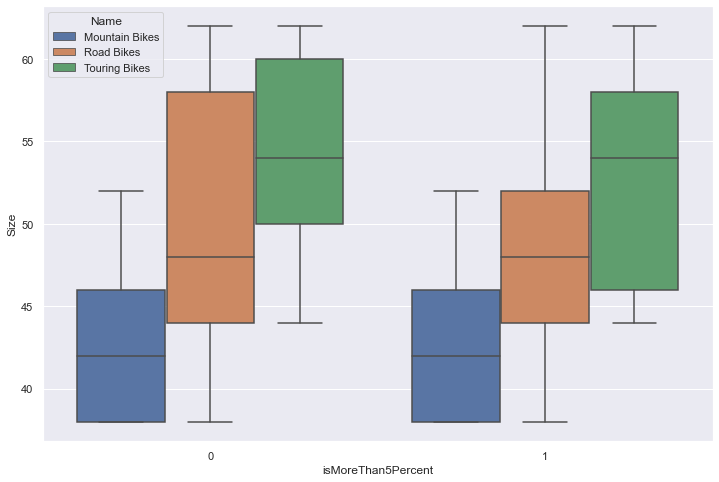

In [51]:
# Gross PRofit by cat Name split into class grups of bike form L-Low to H-High
plt.figure(figsize=(12,8))
sns.boxplot(y="Size", x="isMoreThan5Percent", hue='Name',data=df)

<AxesSubplot:xlabel='isMoreThan5Percent', ylabel='Size'>

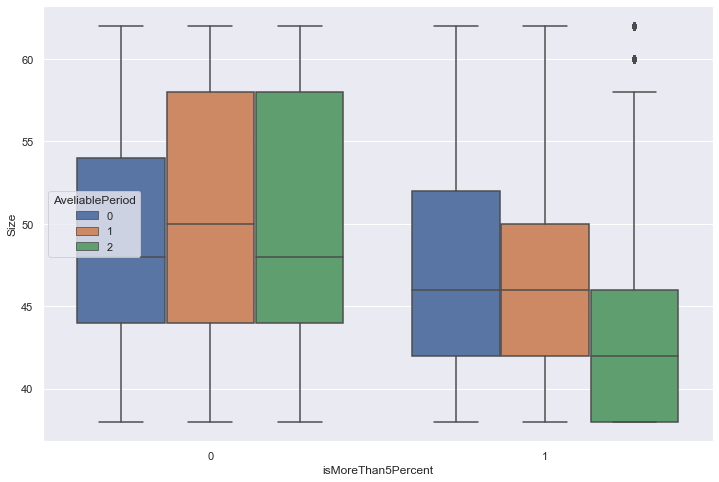

In [45]:
# Gross PRofit by cat Name split into class grups of bike form L-Low to H-High
plt.figure(figsize=(12,8))
sns.boxplot(y="Size", x="isMoreThan5Percent", hue='AveliablePeriod',data=df)

As we can see Older Bikes - more than 2 years of aviability gives positive income for low size bikes. For this group we see the scrongest difference, but generaly for less than 1 or less then 2 years bicykles best performace gives lower sizes bikes. 

###### Lest chceck the weight

<AxesSubplot:xlabel='isMoreThan5Percent', ylabel='Weight'>

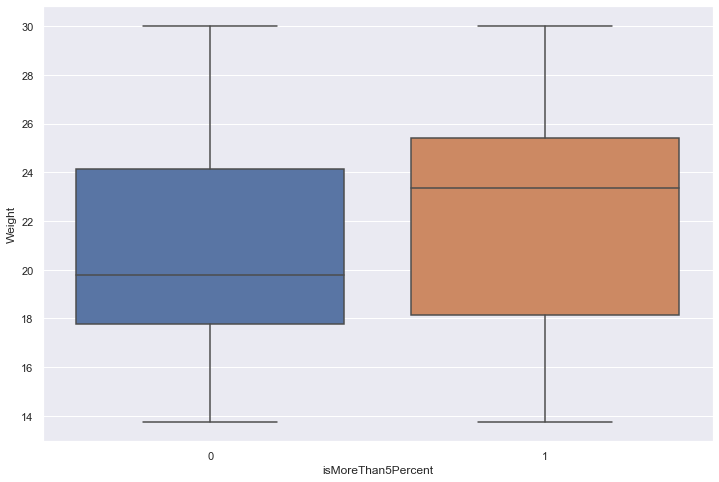

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(y="Weight", x="isMoreThan5Percent",data=df)

This is intresting becouse, heavier bikes is generaly inferior choice than lighter one. As well, we could see in previous charts, tahat lower size gives more chance to positive income. Let's split them by class

<AxesSubplot:xlabel='isMoreThan5Percent', ylabel='Weight'>

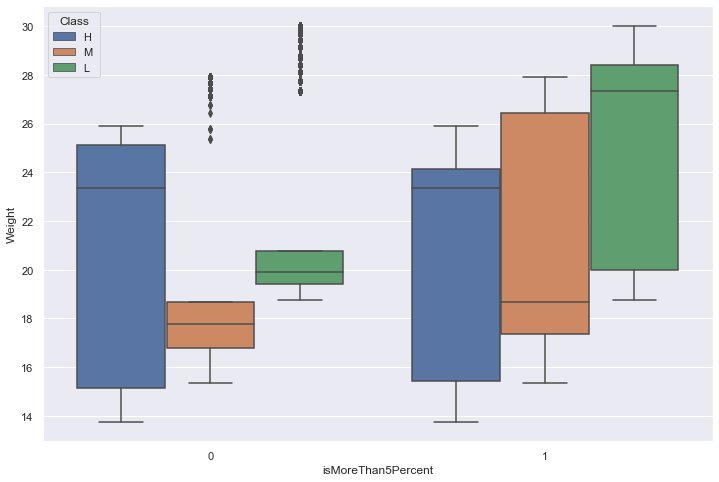

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(y="Weight", x="isMoreThan5Percent",hue='Class', data=df)

As we can see, the bigest difference is for low class bikes. 

<AxesSubplot:xlabel='isMoreThan5Percent', ylabel='Weight'>

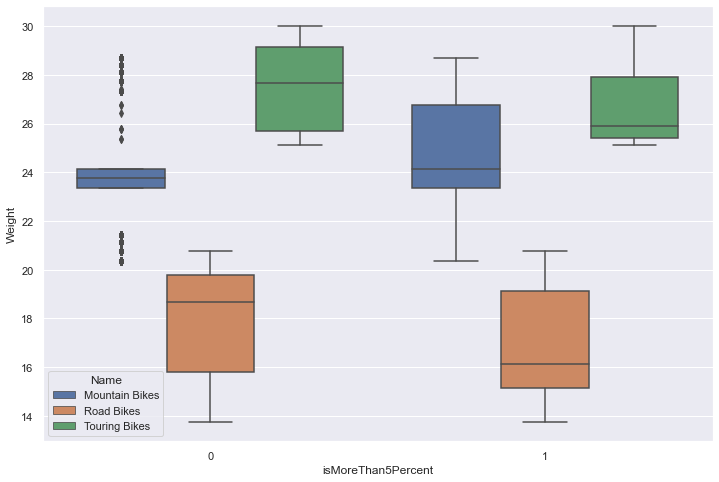

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(y="Weight", x="isMoreThan5Percent",hue='Name', data=df)

<AxesSubplot:xlabel='isMoreThan5Percent', ylabel='Weight'>

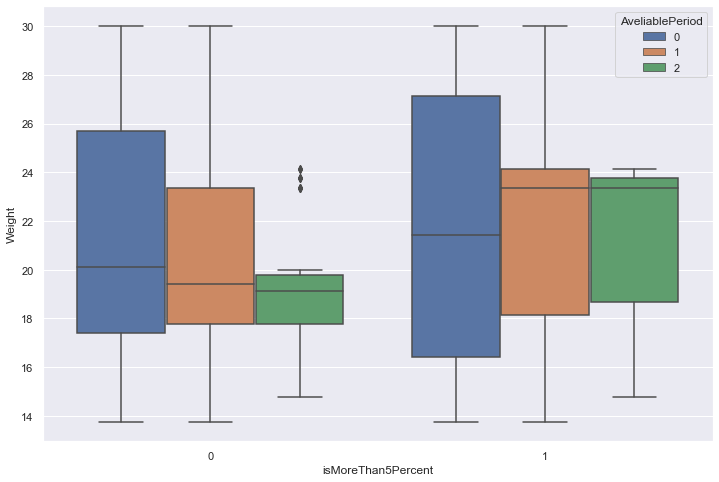

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(y="Weight", x="isMoreThan5Percent",hue='AveliablePeriod', data=df)

I guess than logistic regression will predict profit much better than linear regression, In next notebook I will try to built simple logistic regression model. Than I will use grid search to choese the best paramiters and make model again. If resuls will be pure I will try with other models, like KNN or decision tree 

In [55]:
df.to_csv('Data/DataForLogisticModel.csv', index=False)